In [1]:
from keras.datasets import mnist

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
train_filter = np.where((y_train==0) | (y_train==4))
test_filter = np.where((y_test==0) | (y_test==4))

In [19]:
X_train, Y_train = x_train[train_filter], y_train[train_filter]
X_test, Y_test = x_test[test_filter], y_test[test_filter]

In [21]:
Y_train = [1 if x==4 else x for x in Y_train]
Y_train = np.array(Y_train).reshape(1,-1)
Y_test = [1 if x==4 else x for x in Y_test]
Y_test = np.array(Y_test).reshape(1,-1)

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11765, 784)
(1, 11765)
(1962, 784)
(1, 1962)


In [32]:
X_train[1].shape

(784,)

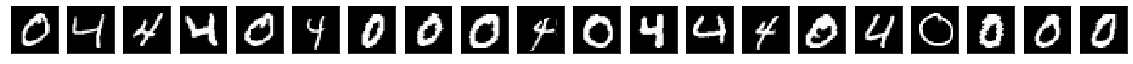

In [33]:
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
print(len(Y_train[np.where(Y_train==0)]))
print(Y_train[0,2])

5923
1


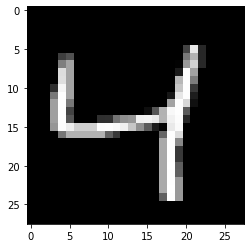

In [46]:
XX_train = X_train.astype('float32')/255.
XX_test = X_test.astype('float32')/255.
plt.imshow(XX_train[1].reshape(28,28))

In [48]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = Y_train.reshape(1,-1)
Y_test = Y_test.reshape(1,-1)

In [51]:
XX_test.shape

(784, 1962)

In [52]:
def initialize_param(d):
    w = np.zeros((d,1))
    b = 0 #broadcasting
    params = {'w':w, 'b':b}
    return params

In [53]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [68]:
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
    return A, cost

In [63]:
def backprop(X, Y, A):
    m = X.shape[1]
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    return dw, db

In [64]:
def optimize(params, X, Y, num_iterations, l_rate):
    w = params['w']
    b = params['w']
    costs = []
    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, db = backprop(X, Y, A)
        params['w'] = params['w'] - l_rate*dw
        params['b'] = params['b'] - l_rate*db
        if i%100 == 0:
            print('Cost on {} interation: {}', i, cost, np.linalg.norm(dw), db)
        costs.append(cost)
    return params, costs

In [65]:
def predict(params, X):
    w = params['w']
    print(w.shape, X.shape)
    b = params['b']
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    return A

In [66]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
        params = initialize_param(d)
        print(params["w"].shape,"pshape")
        params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
        Y_hat_train = predict(params,XX_train)
        Y_hat_test = predict(params,XX_test)

        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
        return params,costs

In [69]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 500, 0.005)

(784, 1) pshape
Cost on {} interation: {} 0 0.6931471805599453 1.568900530685768 0.0034424139396515086
Cost on {} interation: {} 100 0.2600895441127583 0.5527276590667219 -0.03003821392353082
Cost on {} interation: {} 200 0.16814482659646032 0.33097917475520705 -0.017945845392873735
Cost on {} interation: {} 300 0.12870632592946848 0.23755666044382506 -0.0130311371012488
Cost on {} interation: {} 400 0.10650149183880532 0.18633895581768795 -0.010391681390080607
(784, 1) (784, 11765)
(784, 1) (784, 1962)
train accuracy: 91.87579139596755 %
test accuracy: 92.54075744236887 %
